主要是为了对getProvince得到的数据，进行特征分析， 并与getCity的进行对比，找到这两种获取的数据集在xgboost上差别如此大的原因。尤其对应Part3部分。

分析点：

- 看看获取的数据集的大小的区别。


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import pandas as pd
from Pic.maxent_style import *
import datetime

from imblearn.over_sampling import SMOTE
from Pic.maxent_style import maxent_style,remove_palette
from sklearn.preprocessing import StandardScaler
from Pic.maxent_font import tick_font
from Utils.common.custerReadFile import custom_open
import re
from sklearn.preprocessing import MinMaxScaler
from Utils.shanyin.get_data import readData

In [2]:
# file_p = "/Users/chaoxu/code/local-spark/Data/ios_dfp_10_4000/sample/data.json"
# file_p_t = "/Users/chaoxu/code/local-spark/Data/ios_dfp_10_4000/sample_test/data.json"

In [3]:
file_p = "/Users/chaoxu/code/local-spark/Data/shanyin_dfp/sample_p/data.json"
file_p_t = "/Users/chaoxu/code/local-spark/Data/shanyin_dfp/sample_p_test/data.json"

In [4]:
df_p = readData(file_=file_p)
df_p_t = readData(file_=file_p_t)

In [5]:
df_p[['slope']] = df_p[['slope']].astype(float)
df_p[['label']] = df_p[['label']].fillna(0)

In [6]:
df_p_t[['slope']] = df_p_t[['slope']].astype(float)
df_p_t[['label']] = df_p_t[['label']].fillna(0)

In [7]:
obj_df = df_p.select_dtypes(include=['object'])
for col in obj_df:
    dummy_col = pd.get_dummies(df_p[col])
    df_p = pd.concat([df_p, dummy_col], axis=1)
df_p.drop(obj_df, inplace=True, axis=1)

In [8]:
obj_df = df_p_t.select_dtypes(include=['object'])
for col in obj_df:
    dummy_col = pd.get_dummies(df_p_t[col])
    df_p_t = pd.concat([df_p_t, dummy_col], axis=1)
df_p_t.drop(obj_df, inplace=True, axis=1)

In [9]:
df_p['score'].describe()

count    28226.000000
mean         0.030097
std          0.166643
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score, dtype: float64

In [10]:
df_p.label.value_counts()

0    25660
1     2566
Name: label, dtype: int64

In [13]:
df_p.resolution.describe()

count    28226.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: resolution, dtype: float64

In [11]:
df_p_t['score'].describe()

count    115563.000000
mean          0.003151
std           0.051209
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64

In [12]:
df_p_t.label.value_counts()

0    114168
1      1395
Name: label, dtype: int64

In [13]:
df_p.columns[df_p.isnull().any()]

Index([u'city_entropy', u'device_browser_engine_entropy', u'device_entropy',
       u'device_osversion_entropy', u'ip_entropy', u'ip_seg_16_entropy',
       u'ip_seg_24_entropy', u'province_entropy', u'user_agent_entropy'],
      dtype='object')

In [14]:
df_p_t.columns[df_p_t.isnull().any()]

Index([u'city_entropy', u'device_browser_engine_entropy', u'device_entropy',
       u'device_osversion_entropy', u'ip_entropy', u'ip_seg_16_entropy',
       u'ip_seg_24_entropy', u'province_entropy', u'user_agent_entropy'],
      dtype='object')

In [15]:
df_p.loc[df_p.city_entropy.isnull()].shape

(22377, 22)

In [16]:
df_p.city_entropy.shape

(28226,)

In [26]:
df_p.loc[(df_p.city_entropy.isnull()) & (df_p.province_entropy.isnull())].shape

(2746, 22)

In [17]:
df_p_t.loc[df_p_t.city_entropy.isnull()].shape

(91053, 22)

In [18]:
df_p_t.loc[(df_p_t.city_entropy.notnull()) & (df_p_t.province_entropy.notnull())].shape

(0, 22)

In [19]:
df_p_t.loc[(df_p_t.city_entropy.isnull()) & (df_p_t.province_entropy.isnull())].shape

(10007, 22)

In [20]:
df_p_t.city_entropy.shape

(115563,)

In [21]:
df_p.loc[df_p.province_entropy.isnull()].shape

(8595, 22)

In [22]:
df_p.province_entropy.shape

(28226,)

In [23]:
df_p_t.loc[df_p_t.province_entropy.isnull()].shape

(34517, 22)

In [24]:
df_p_t.province_entropy.shape

(115563,)

In [25]:
df_p_t.shape

(115563, 22)

In [26]:
df_p = df_p.fillna(-6.666)

In [27]:
df_p_t = df_p_t.fillna(-6.666)

In [28]:
cols = df_p.columns.difference(['label'])

('cn', u'baseEntropy')


/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


('cn', u'boottime_entropy')
('cn', u'city_entropy')
('cn', u'client_ts_diff')
('cn', u'client_ts_entropy')
('cn', u'device_browser_engine_entropy')
('cn', u'device_entropy')
('cn', u'device_model')
('cn', u'device_osversion_entropy')
('cn', 'event_fly')
('cn', u'ip_entropy')
('cn', u'ip_seg_16_entropy')
('cn', u'ip_seg_24_entropy')
('cn', u'jsid_entropy')
('cn', u'province_entropy')
('cn', u'resolution')
('cn', 'score')
('cn', u'slope')
('cn', u'tcpts_diff')
('cn', u'ts_diff')
('cn', u'user_agent_entropy')


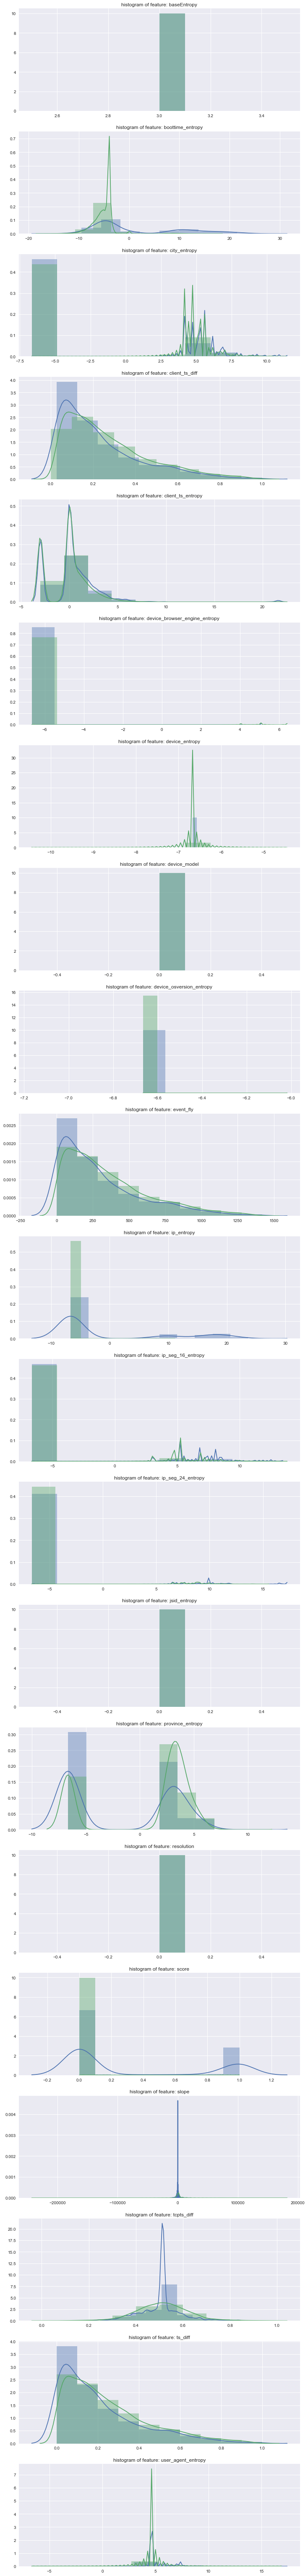

In [29]:
X = df_p[cols]
y = df_p.ix[:, df_p.columns == 'label']
v_features = cols
pic_nums = v_features.shape[0]
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(pic_nums, 1)
for i, cn in enumerate(df_p[v_features]):
    print("cn",cn)
    ax = plt.subplot(gs[i])
    sns.distplot(df_p[cn][df_p.label == 1], bins=10)
    sns.distplot(df_p[cn][df_p.label == 0], bins=10)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [30]:
drop_cols = ['baseEntropy','device_browser_engine_entropy',
              'device_model','jsid_entropy','resolution']

In [31]:
df_p = df_p.drop(drop_cols,axis=1)

In [32]:
df_p.columns

Index([        u'boottime_entropy',             u'city_entropy',
              u'client_ts_entropy',           u'device_entropy',
       u'device_osversion_entropy',                u'event_fly',
                     u'ip_entropy',        u'ip_seg_16_entropy',
              u'ip_seg_24_entropy',                    u'label',
               u'province_entropy',                    u'score',
                          u'slope',       u'user_agent_entropy',
                 u'client_ts_diff',               u'tcpts_diff',
                        u'ts_diff'],
      dtype='object')

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ts_match = re.compile('^.*ts_diff$')
ts_amatch = np.vectorize(lambda x:bool(ts_match.match(x)))
ts_cols = df_p.columns.values[ts_amatch(df_p.columns.values)]
ts_df_p = df_p[ts_cols]
ts_no = df_p[df_p.columns.difference(ts_cols)]

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(ts_df_p)
ts_df_p = pd.DataFrame(X_scaled, columns = ts_df_p.columns)
df_p = pd.concat([ts_no, ts_df_p], axis=1)

In [34]:
def tick_font_new(ax=None,font_size=None,rotation=90):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
        tick.label.set_rotation(rotation)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
        tick.label.set_rotation(0)
    return None

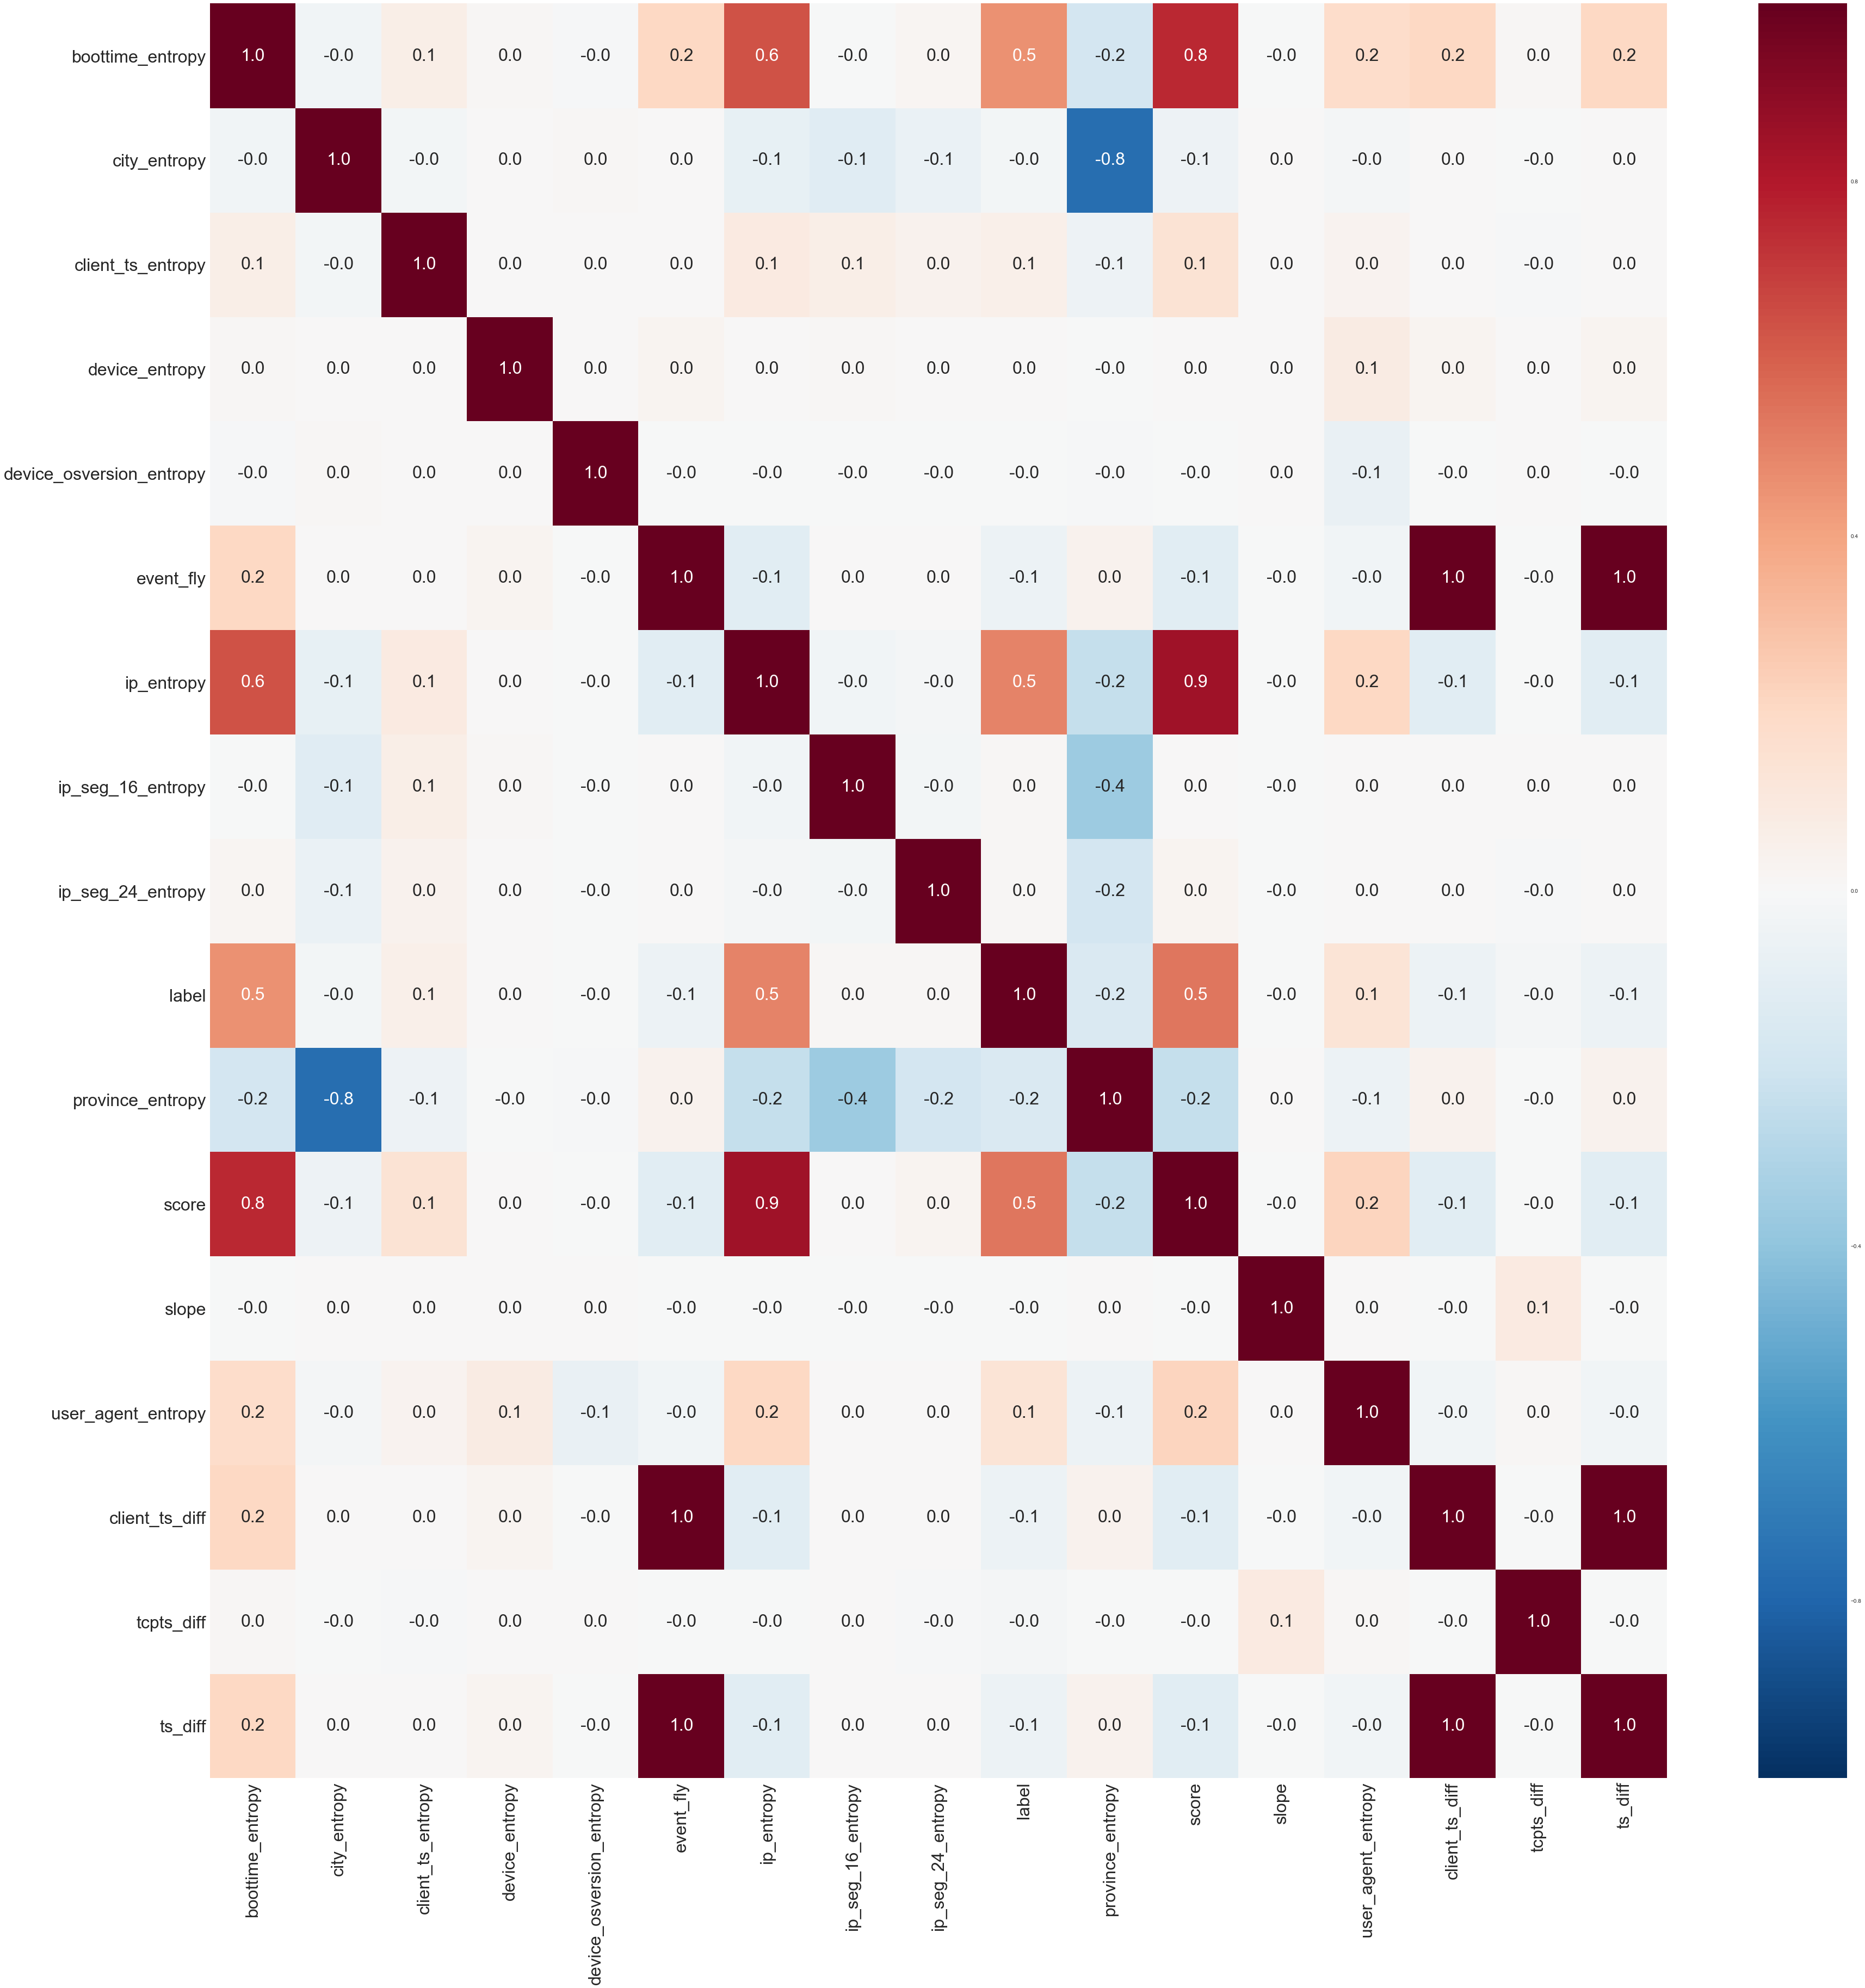

In [35]:
fig,ax= plt.subplots(figsize=(60,60))
sns.heatmap(df_p.corr(),ax=ax,annot=True,fmt='.1f',annot_kws={"size": 32})
tick_font(ax=ax,font_size=32,rotation_y=0)
plt.show()

In [36]:
df_p = df_p.drop(['ts_diff'],axis=1)

In [37]:
df_p.columns

Index([        u'boottime_entropy',             u'city_entropy',
              u'client_ts_entropy',           u'device_entropy',
       u'device_osversion_entropy',                u'event_fly',
                     u'ip_entropy',        u'ip_seg_16_entropy',
              u'ip_seg_24_entropy',                    u'label',
               u'province_entropy',                    u'score',
                          u'slope',       u'user_agent_entropy',
                 u'client_ts_diff',               u'tcpts_diff'],
      dtype='object')

In [38]:
df_p.shape

(28226, 16)

In [39]:
df_p_t.shape

(115563, 22)

('cn', u'baseEntropy')
('cn', u'boottime_entropy')
('cn', u'city_entropy')
('cn', u'client_ts_diff')
('cn', u'client_ts_entropy')
('cn', u'device_browser_engine_entropy')
('cn', u'device_entropy')
('cn', u'device_model')
('cn', u'device_osversion_entropy')
('cn', 'event_fly')
('cn', u'ip_entropy')
('cn', u'ip_seg_16_entropy')
('cn', u'ip_seg_24_entropy')
('cn', u'jsid_entropy')
('cn', u'province_entropy')
('cn', u'resolution')
('cn', 'score')
('cn', u'slope')
('cn', u'tcpts_diff')
('cn', u'ts_diff')
('cn', u'user_agent_entropy')


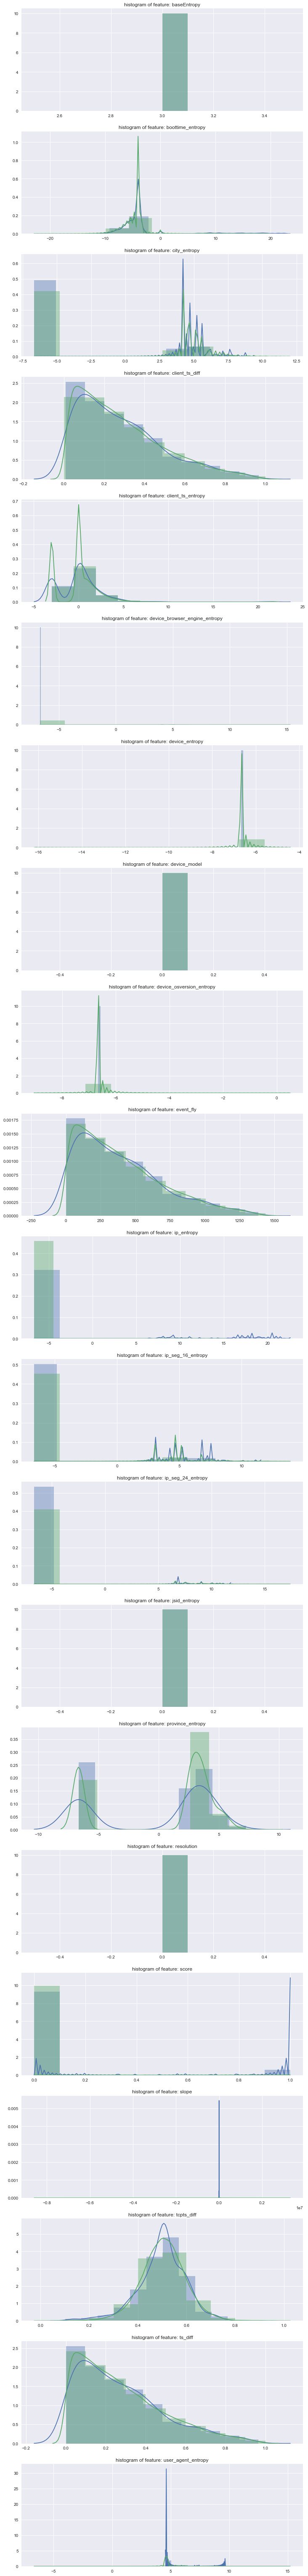

In [40]:
X = df_p_t[cols]
y = df_p_t.ix[:, df_p_t.columns == 'label']
v_features = cols
pic_nums = v_features.shape[0]
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(pic_nums, 1)
for i, cn in enumerate(df_p_t[v_features]):
    print("cn",cn)
    ax = plt.subplot(gs[i])
    sns.distplot(df_p_t[cn][df_p_t.label == 1], bins=10)
    sns.distplot(df_p_t[cn][df_p_t.label == 0], bins=10)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [41]:
drop_cols1 = ['baseEntropy','device_browser_engine_entropy',
              'device_model','jsid_entropy','resolution']